In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

E:\Anaconda3\envs\ML_new\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Anaconda3\envs\ML_new\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Anaconda3\envs\ML_new\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

### Scale the data

In [3]:
X_train = X_train / 255.0 
X_test = X_test / 255.0 
y_train = y_train 
y_test = y_test

### Show sample image

In [4]:
# plt.imshow(X_train[142], cmap="binary") 
# plt.axis('off')
# plt.show()

### Declare class names 

In [5]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[int(y_train[142])]

'but'

### Create Sequential model with dense layers

In [6]:
model = tf.keras.Sequential(
    layers = [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


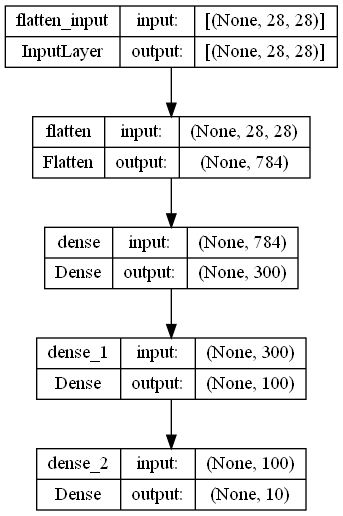

In [8]:
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

### Model compilation

In [9]:
model.compile(
    optimizer='sgd', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

### Tensorboard callback

In [10]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

### Train the neural network

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    verbose=1,
    validation_split=0.1,
    callbacks=[tensorboard_cb]
)

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7395 - accuracy: 0.7518 - val_loss: 0.5542 - val_accuracy: 0.8073
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4948 - accuracy: 0.8278 - val_loss: 0.4491 - val_accuracy: 0.8423
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4479 - accuracy: 0.8450 - val_loss: 0.4277 - val_accuracy: 0.8522
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4200 - accuracy: 0.8531 - val_loss: 0.4246 - val_accuracy: 0.8450
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8608 - val_loss: 0.3993 - val_accuracy: 0.8597
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8669 - val_loss: 0.3871 - val_accuracy: 0.8600
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8697 - val_loss: 0.3812 - val_accuracy:

### Check the results arbitrary

In [12]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
# plt.imshow(image[0], cmap="binary")
# plt.axis('off')
# plt.show()

1/1 [==============================] - 0s 65ms/step
Prediction: kozak
Confidence: 0.43820864
Truth: sandał


### Open the tensorboard

In [13]:
# %load_ext tensorboard
# %tensorboard --logdir ./housing_logs --host localhost --port 8088

### Save the model

In [14]:
model.save('fashion_clf.h5')

## Regression

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Tensorboard

root_logdir = os.path.join(os.curdir, "housing_logs")

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [17]:
housing = fetch_california_housing()

### Prepare the data 

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Create the model

In [20]:
reg_model = tf.keras.Sequential(
    layers = [
        tf.keras.layers.Dense(
            30, 
            activation="relu", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(1)
    ]
)

In [21]:
reg_model.compile(
    optimizer='sgd', 
    loss=tf.keras.losses.MeanSquaredError(),
)

In [22]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

### Prepare logs catch

In [23]:
root_logdir = os.path.join(os.curdir, "housing_logs")

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

### Fit the model

In [24]:
reg_model.fit(
    X_train,
    y_train,
    epochs=30,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[es, tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8513 - val_loss: 5.1808
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4973 - val_loss: 0.4053
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4191 - val_loss: 0.3789
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4051 - val_loss: 0.3692
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3924 - val_loss: 0.3709
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.3731
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 0.3762
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3784 - val_loss: 0.3760
Epoch 8: early stopping


In [25]:
# %load_ext tensorboard
# %tensorboard --logdir ./housing_logs --port=6006

### Save the model

In [26]:
reg_model.save("reg_housing_1.h5")

# Model 2 - Regression

### Create and train the model

In [27]:
reg_model2 = tf.keras.Sequential(
    layers = [
        tf.keras.layers.Dense(
            30, 
            activation="relu", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(
            2, 
            activation="softmax", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(
            6, 
            activation="relu", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(1)
    ]
)

In [28]:
reg_model2.compile(
    optimizer='sgd', 
    loss=tf.keras.losses.MeanSquaredError(),
)

In [29]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

### Prepare logs catch

In [30]:
root_logdir = os.path.join(os.curdir, "housing_logs")

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [31]:
reg_model2.fit(
    X_train,
    y_train,
    epochs=30,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[es, tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.0508 - val_loss: 0.5182
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4770 - val_loss: 0.4100
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.3791
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3942 - val_loss: 0.3682
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3940 - val_loss: 0.3670
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3772 - val_loss: 0.3479
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 0.3461
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.3535
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3592 - val_loss: 0.3384
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3559 - val_loss: 0.3352

### Save the model

In [32]:
reg_model2.save("reg_housing_2.h5")

# Model 3 - Regression

### Create and train the model

In [33]:
reg_model3 = tf.keras.Sequential(
    layers = [
        tf.keras.layers.Dense(
            60, 
            activation="relu", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(
            30, 
            activation="relu", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(
            10, 
            activation="softmax", 
              input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(1)
    ]
)

In [34]:
reg_model3.compile(
    optimizer='sgd', 
    loss=tf.keras.losses.MeanSquaredError(),
)

In [35]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, verbose=1)

### Prepare logs catch

In [36]:
root_logdir = os.path.join(os.curdir, "housing_logs")

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [37]:
reg_model3.fit(
    X_train,
    y_train,
    epochs=30,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[es, tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3387 - val_loss: 0.8070
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7062 - val_loss: 0.5999
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5532 - val_loss: 0.4768
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4131
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.3850
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3945 - val_loss: 0.3725
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3779 - val_loss: 0.3579
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3718 - val_loss: 0.3640
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3671 - val_loss: 0.3447
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3403

### Save the model

In [38]:
reg_model3.save("reg_housing_3.h5")

# Tensorboard

In [39]:
# %load_ext tensorboard
# %tensorboard --logdir ./housing_logs